In [3]:
#Importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
pd.set_option('display.max_columns', None)

# Gather Data

We shall start by loading the data

In [5]:
df = pd.read_csv('./Data/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [8]:

df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


## assessment

- We need to select the columns that we will use in the study
- We need to filter the data of the respondants we are not interested in (students, part-time, etc.)
- We need to create a column with the location of the respondant, be it North America or Europe
- We need to leave the Respondant value as a string, since is the id and we dont want that data as numerical
- We need to map the YearsCodedJob variable into an easier to read value as to be able to graph it better
- We need to deal with the missing values

# Clean Data
We select our columns of interest and filter the data of the unwanted respondants.

In [10]:
# We select our variables of interest, since they are the ones we want to asses
columns = ['Respondent','Country', 'YearsCodedJob', 'FormalEducation', 'CareerSatisfaction', 'Salary']

# We apply our filters
data = df[df['Professional']=='Professional developer']
data = data[data['EmploymentStatus']=='Employed full-time']

# we filter our columns of interest
data = data[columns]
data.head()

,Respondent,Country,YearsCodedJob,FormalEducation,CareerSatisfaction,Salary
2,3,United Kingdom,20 or more years,Bachelor's degree,8.0,113750.0
4,5,Switzerland,10 to 11 years,Master's degree,6.0,NaN
7,8,Poland,7 to 8 years,Master's degree,7.0,NaN
8,9,Colombia,7 to 8 years,Bachelor's degree,6.0,NaN
11,12,Canada,8 to 9 years,Bachelor's degree,8.0,NaN


Then, we shall create our Location variable, which will indicate if the data point comes from North America or Europe

In [11]:
Europe = ['Liechtenstein', 'Switzerland','Iceland', 'Norway','Denmark','Ireland', 'United Kingdom', 'Germany',
          'Netherlands', 'Sweden', 'Luxembourg', 'Austria','Finland', 'France', 'Belgium', 'Spain', 'Italy','Poland']

North_America = ['United States', 'Canada']
    
#Add a new catagory seperating to western and eastern
data['Location'] = data['Country'].apply(lambda x: 'Europe' if x in Europe 
                                         else ('North_America' if x in North_America else 'Other'))

data.head()

,Respondent,Country,YearsCodedJob,FormalEducation,CareerSatisfaction,Salary,Location
2,3,United Kingdom,20 or more years,Bachelor's degree,8.0,113750.0,Europe
4,5,Switzerland,10 to 11 years,Master's degree,6.0,NaN,Europe
7,8,Poland,7 to 8 years,Master's degree,7.0,NaN,Europe
8,9,Colombia,7 to 8 years,Bachelor's degree,6.0,NaN,Other
11,12,Canada,8 to 9 years,Bachelor's degree,8.0,NaN,North_America


Now that we created the location value, we can filter out any respondant that is not in those countries of interest

In [12]:
data = data[data['Location'].isin(["Europe","North_America"])]

data.Location.unique()

array(['Europe', 'North_America'], dtype=object)

Since we will use the number of years in a job, we shall map a value that will be easier to read and also easier to plot

In [13]:
years = {'Less than a year' : 0,
            '1 to 2 years' : 1, 
            '2 to 3 years' : 2,
            '3 to 4 years' : 3, 
            '4 to 5 years' : 4, 
            '5 to 6 years' : 5, 
            '6 to 7 years' : 6, 
            '7 to 8 years' : 7, 
            '8 to 9 years' : 8, 
            '9 to 10 years' : 9, 
            '10 to 11 years' : 10, 
            '11 to 12 years' : 11, 
            '12 to 13 years' : 12,
            '13 to 14 years' : 13, 
            '14 to 15 years' : 14, 
            '15 to 16 years' : 15, 
            '16 to 17 years' : 16,
            '17 to 18 years' : 17, 
            '18 to 19 years' : 18, 
            '19 to 20 years' : 19, 
            '20 or more years' : 20,
            np.nan : -1}

data = data.reset_index()
data['YearsCodedJob'] = data['YearsCodedJob'].apply(lambda x: years[x])
data['YearsCodedJob'] = pd.to_numeric(data['YearsCodedJob'])

# We erase the points with -1 since they were the placeholders for -1
data = data[data['YearsCodedJob'] != -1]

data.YearsCodedJob.unique()

array([20, 10,  7,  8, 15,  3,  9, 16,  0,  2,  5,  4,  1, 12, 14, 13, 18,
       17, 11,  6, 19], dtype=int64)

For missing values, since we are working with 2 target variables, salary and career satisfaction, we shall create 2 different datasets, one for each, and eliminate those cases that do not have the target variable, as we do not want to create sinthetic data that will stain the study

In [14]:
salary = data[data['Salary'].notnull()]
salary.drop('CareerSatisfaction', axis=1, inplace=True)

CareerSatisfaction = data[data['CareerSatisfaction'].notnull()]
CareerSatisfaction.drop('Salary', axis=1, inplace=True)

# Analyze and Visualize
### Question 1: Which location has the highest salary?
Now, as a person looking for a new place to work, salary is one of the main concerns, so lets investigate which of the 2 continents has a higher salary in general

In [15]:
columns = ['Country', 'YearsCodedJob', 'FormalEducation','Salary', 'Location']
                                                                    
salary = salary[columns]

as to avoid the data to be influenced too much by outliers, we shall take the median as our value of comparison

Text(0.5, 1.0, 'Median of Salaries by Location')

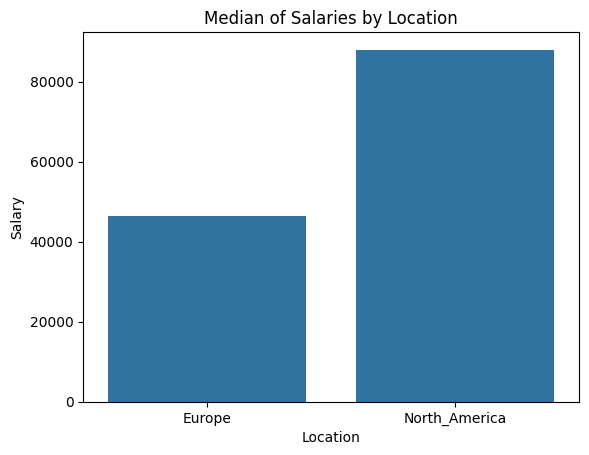

In [18]:
salary_plot = salary.groupby(['Location'])['Salary'].median().reset_index()

sns.barplot(x = 'Location', y = 'Salary', data = salary_plot)
plt.title('Median of Salaries by Location')

> We can easily see that North America has a higher salary than Europe, but, that may change if you have a higher education.


Since we are also thinking of doing a master's degree in the near future, we are curious to see how much does formal education change your salary in each continent

Text(0.5, 1.0, 'Median of Salaries by\n Location and Formal Education')

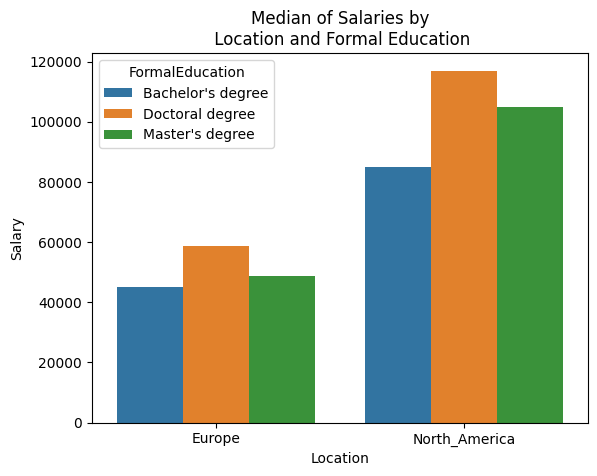

In [19]:
salary_academics = salary.copy()

salary_academics = salary_academics[salary_academics['FormalEducation'].isin(["Bachelor's degree","Master's degree",
                                                                              'Doctoral degree'])]
          

salary_academics_plot = salary_academics.groupby(['Location','FormalEducation'])['Salary'].median().reset_index()

sns.barplot(x = 'Location', y = 'Salary', hue = 'FormalEducation', data = salary_academics_plot)
plt.title('Median of Salaries by\n Location and Formal Education')

> We can see that with a bachelor's, master's or a PhD, you will have a better salary in North America.

### Question 2: Which location has the highest salary growth?
But that is not all that is important, since we are planning on living for a long time on our new home, so we need to have a clear idea if salaries experience growth as we have more and more experience at our jobs

In [20]:
salary_years = salary.copy()


# Select our columns of interest
columns = ['YearsCodedJob','Salary', 'Location']
salary_years = salary_years[columns]

# We drop data that does not have a YearsCodedJob value, remember that -1 was a null value
salary_years = salary_years[salary_years['YearsCodedJob'] != -1]

In [21]:
# As before, to protect ourselfs from outliers, we will use median as our base of measure
salary_years = salary_years.groupby(['Location','YearsCodedJob'])['Salary'].median().reset_index()

# Since we want to calculate change, it would be easier if we separate the continents
sy_Europe = salary_years[salary_years['Location'] == 'Europe']
sy_North = salary_years[salary_years['Location'] == 'North_America']

# We want the total change over time, si we calculate the cumulative change rate
sy_Europe['change'] = sy_Europe['Salary'].pct_change().cumsum()
sy_North['change'] = sy_North['Salary'].pct_change().cumsum() 

# We join both data frames 
salary_years = pd.concat([sy_Europe,sy_North])

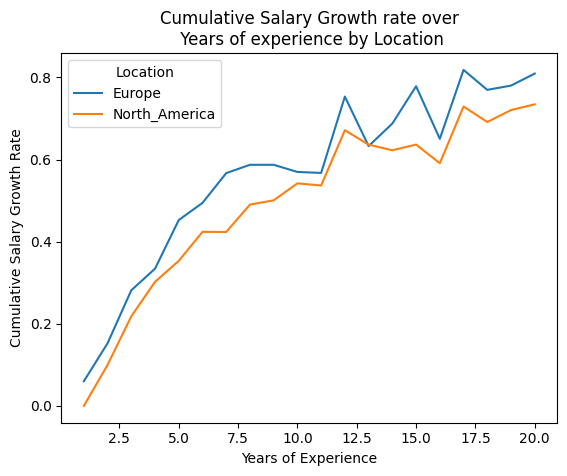

In [22]:
# We erase the starting points of each continent since the value is nan
salary_years = salary_years[salary_years['YearsCodedJob'] != 0] 

ax = sns.lineplot(x="YearsCodedJob", y="change", hue="Location", data=salary_years)
plt.title('Cumulative Salary Growth rate over\n Years of experience by Location')
plt.ylabel('Cumulative Salary Growth Rate')
plt.xlabel('Years of Experience');

> The cumulative growth of the salary rate in both locations is pretty similar

### Question 3: which location has the highest career satisfaction?

In [24]:
columns = ['YearsCodedJob', 'CareerSatisfaction','Location']
CareerSatisfaction = CareerSatisfaction[columns]

Since career satisfaction is a value that has a maximum value of 10, we can be sure that there are no outliers, so we can use the mean of the data

In [25]:
# We group our data by years coded and obtain the mean of the satisfaction
CareerSatisfaction = CareerSatisfaction.groupby(['Location','YearsCodedJob'])['CareerSatisfaction'].mean().reset_index()

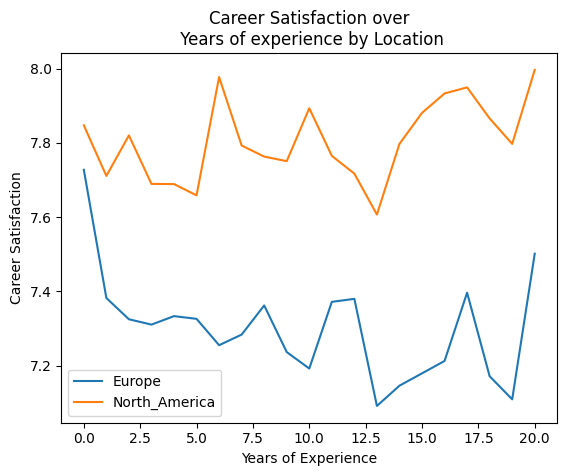

In [26]:
sns.lineplot(x="YearsCodedJob", y="CareerSatisfaction", hue="Location", data=CareerSatisfaction)
plt.ylabel('Career Satisfaction')
plt.xlabel('Years of Experience')
plt.title('Career Satisfaction over\n Years of experience by Location');
plt.legend(loc=3);

> We can see that both locations start with a pretty similar career satisfaction, but Europe has a drop at the firts year while North America has a stable behavior, with also a drop, but very small and almost right away, has an increase of satisfaction.